## Include and load data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Uncomment the following lines to fuse multiple scores.json files
# # Load all scores
# all_scores = None
# initial_path = "../outputs/scores/"
# for dir in os.listdir(initial_path):
#     if os.path.isdir(os.path.join(initial_path, dir)):
#         path = os.path.join(initial_path, dir)
#         for subdir in os.listdir(path):
#             if os.path.isdir(os.path.join(path, subdir)):
#                 with open(f"{os.path.join(path, subdir)}/scores.json", "r", encoding="utf-8") as f:
#                     data = json.load(f)
#                     if all_scores is None:
#                         all_scores = data["scores"]#(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
#                         all_rules = data["rules"] #(nb_rules)
#                         all_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
#                         algorithm_used = data["algorithm_used"] # (nb_rules)
#                         all_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)
#                     else:
#                         # Fuse scores
#                         for i_episode,score_episode in enumerate(all_scores):
#                             for i_transition,score_transition in enumerate(score_episode):
#                                 score_transition.extend(data["scores"][i_episode][i_transition])
#                         all_rules.extend(data["rules"])
#                         algorithm_used.extend(data["algorithm_used"])
#                         assert all_index_true == data["true_obs_index"]
#                         assert all_transition_type == data["transition_type"]
# ## Save the fused scores
# with open(f"{initial_path}/fused_scores.json", "w", encoding="utf-8") as f:
#     json.dump({"scores": all_scores, "rules": all_rules, "true_obs_index": all_index_true, "algorithm_used": algorithm_used, "transition_type": all_transition_type}, f)

# print(len(all_scores), len(all_scores[0]), len(all_scores[0][0]), len(all_scores[0][0][0]))
# print(len(all_rules), len(algorithm_used))

def remove_algo(name:str, algo:str, output_name:str="scores_without_algo") -> None:
    # Remove the scores of the algorithm
    with open(f"../outputs/scores/{name}.json", "r", encoding="utf-8") as f:
        data = json.load(f)
        all_scores = data["scores"]#(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
        all_rules = data["rules"] #(nb_rules)
        all_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
        algorithm_used = data["algorithm_used"] # (nb_rules)
        all_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)
        all_possible_transition_mask = data["possible_transition_mask"] #(nb_episodes, nb_transitions, nb_possibilities)
        for i_episode, score_episode in enumerate(all_scores):
            for i_transition, score_transition in enumerate(score_episode):
                all_scores[i_episode][i_transition] = [score for i_algo, score in enumerate(score_transition) if algorithm_used[i_algo] != algo]
                all_rules = [rule for i_rule, rule in enumerate(all_rules) if algorithm_used[i_rule] != algo]
                algorithm_used = [algo for algo in algorithm_used if algo != algo]
        # Save the scores without the algorithm
        with open(f"../outputs/scores/{output_name}.json", "w", encoding="utf-8") as f:
            json.dump({"scores": all_scores, "rules": all_rules, "true_obs_index": all_index_true, "algorithm_used": algorithm_used, "transition_type": all_transition_type,"possible_transition_mask": all_possible_transition_mask}, f)
            
            
def fuse_scores(name1:str, name2:str, output_name:str="fused_scores") -> None:
    # Fuse the scores with the base one
    with open(f"../outputs/scores/{name1}.json", "r", encoding="utf-8") as f:
        data = json.load(f)
        all_scores = data["scores"]#(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
        all_rules = data["rules"] #(nb_rules)
        all_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
        algorithm_used = data["algorithm_used"] # (nb_rules)
        all_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)
        all_possible_transition_mask = data["possible_transition_mask"] #(nb_episodes, nb_transitions, nb_possibilities)

    with open(f"../outputs/scores/{name2}.json", "r", encoding="utf-8") as f:
        data = json.load(f)
        base_scores = data["scores"]#(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
        base_rules = data["rules"] #(nb_rules)
        base_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
        base_algorithm_used = data["algorithm_used"] # (nb_rules)
        base_transition_type = data["transition_type"] #(nb_episodes, nb_transitions)
        base_possible_transition_mask = data["possible_transition_mask"] #(nb_episodes, nb_transitions, nb_possibilities)
        
    #Fuse scores
    for i_episode,score_episode in enumerate(all_scores):
        for i_transition,score_transition in enumerate(score_episode):
            score_transition.extend(base_scores[i_episode][i_transition])
    all_rules.extend(base_rules)
    algorithm_used.extend(base_algorithm_used)
    assert all_index_true == base_index_true
    assert all_transition_type == base_transition_type
    assert all_possible_transition_mask == base_possible_transition_mask
    # Save the fused scores
    with open(f"../outputs/scores/{output_name}.json", "w", encoding="utf-8") as f:
        json.dump({"scores": all_scores, "rules": all_rules, "true_obs_index": all_index_true, "algorithm_used": algorithm_used, "transition_type": all_transition_type,"possible_transition_mask": all_possible_transition_mask}, f)

    print(len(all_scores), len(all_scores[0]), len(all_scores[0][0]), len(all_scores[0][0][0]))
    print(len(all_rules), len(algorithm_used))

In [3]:
# Load the data from the file
with open("../outputs/scores/scores.json", "r", encoding="utf-8") as f:
    data = json.load(f)
    all_scores = data["scores"] #(nb_episodes, nb_transitions, nb_rules, nb_possibilities)
    all_rules = data["rules"] #(nb_rules)
    all_index_true = data["true_obs_index"] #(nb_episodes, nb_transitions)
    algorithm_used = data["algorithm_used"] # (nb_rules)
    all_transition_type = data["transition_type"] #(nb_episodes, nb_transitions, nb_possibilities)
    all_possible_transition_mask = data["possible_transition_mask"] #(nb_episodes, nb_transitions, nb_possibilities)
n_transitions = sum([len(scores) for scores in all_scores])

In [4]:
#Create a random answer that will be used as a baseline
SEED = 42
np.random.seed(SEED)
for i_epi, episode in enumerate(all_transition_type):
    for i_trans, transition in enumerate(episode):
        scores = [-np.inf]*len(transition)
        index = np.random.choice(np.arange(len(transition)), max(10, len(transition)), replace=False)
        for i in index:
            scores[i] = -i
        all_scores[i_epi][i_trans] = [scores] + all_scores[i_epi][i_trans]
all_rules = ["Random"] + all_rules
algorithm_used= ["Random"] + algorithm_used

In [5]:
#Change algo names for plot
algo_names_for_plot = {
    None: "No Rule",
    "PB": "O-Hardest",
    "CP": "O-Curriculum",
    "RB": "O-Random",
    "DB": "O-Ideal",
    "LL": "RL-LogP",
    "ALP": "RL-ALP",
    "ALPEXP": "RL-ALPEXP",
    "F-LL": "F-LogP",
    "F-ALPEXP": "F-ALPEXP",
    "F-ALP": "F-ALP",
    "F-RB": "F-Random",
    "F-DB": "F-Ideal",
    "Custom": "Custom",
    "FalseCustom": "FalseCustom",
    "Random": "T-Random",
}
#Replace None by "None"
all_rules = ["None" if x is None else x for x in all_rules]
algorithm_used = [algo_names_for_plot[algo_name] for algo_name in algorithm_used]

In [6]:
#Change transition names for plot
trans_names_for_plot = {"standing": "Standing", "holding1": "Holding 1", "holding2": "Holding 2","transformP":"Grow Plant", "transformSH":"Grow S.H.", "transformBH": "Grow B.H."}
all_transition_type = [[[trans_names_for_plot[_tran] for _tran in transitions] for transitions in episode] for episode in all_transition_type]

In [7]:
#Filter only these algos
ALGOS_TO_KEEP = ["No Rule", "O-Hardest","O-Curric","O-Random","O-Ideal","RL-LogP","RL-ALP","RL-ALPEXP","F-LogP","F-ALPEXP","F-ALP","F-Random","F-Ideal"]
# ALGOS_TO_KEEP = ["No Rule","O-Random","O-Ideal","O-Curriculum","O-Hardest","RL-LogP","RL-ALP","RL-ALPEXP"]
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        all_scores[i][j] = [all_scores[i][j][k] for k in range(len(all_scores[i][j])) if algorithm_used[k] in ALGOS_TO_KEEP]
all_rules = [rule for k,rule in enumerate(all_rules) if algorithm_used[k] in ALGOS_TO_KEEP]
algorithm_used = [algo for algo in algorithm_used if algo in ALGOS_TO_KEEP]

In [8]:
# # Filter to keep only the transitions that are possible
# ## For scores
# for i_episode,score_episode in enumerate(all_scores):
#     for i_transition,score_transition in enumerate(score_episode):
#         for i_rule, score_rule in enumerate(score_transition):
#             score_transition[i_rule] = [score for i,score in enumerate(score_rule) if all_possible_transition_mask[i_episode][i_transition][i]]

# ## For index_true
# for i_episode,episode in enumerate(all_transition_type):
#     for i_transition,transition in enumerate(episode):
#         new_index = 0
#         has_found = False
#         for i_possibilities in range(len(transition)):
#             if all_possible_transition_mask[i_episode][i_transition][i_possibilities]:
#                 new_index += 1
#                 if i_possibilities == all_index_true[i_episode][i_transition]:
#                     all_index_true[i_episode][i_transition] = new_index-1
#                     has_found = True
#                     break
#         assert has_found         
        

# ## For all_transition_type
# for i_episode,episode in enumerate(all_transition_type):
#     for i_transition,transition in enumerate(episode):
#         all_transition_type[i_episode][i_transition] = [transition for i,transition in enumerate(transition) if all_possible_transition_mask[i_episode][i_transition][i]]

## Compute the score for each algorithm

In [9]:
#Check if higher score is reached on the true observation for each rule
accuracies = {"Top 1":[0 for _ in range(len(all_rules))], "Top 3":[0 for _ in range(len(all_rules))], "Top 5":[0 for _ in range(len(all_rules))], "Top 10":[0 for _ in range(len(all_rules))]}
for i_rule in range(len(all_rules)):
    for i_episode, score_episode in enumerate(all_scores):
        for i_transition, score_transition in enumerate(score_episode):
            true_score = score_transition[i_rule][all_index_true[i_episode][i_transition]]
            sorted_score_transition = sorted(score_transition[i_rule], reverse=True)
            index_true = sorted_score_transition.index(true_score)
            if index_true < 10:
                accuracies["Top 10"][i_rule] += 1
                if index_true < 5:
                    accuracies["Top 5"][i_rule] += 1
                    if index_true < 3:
                        accuracies["Top 3"][i_rule] += 1
                        if index_true ==0:
                            accuracies["Top 1"][i_rule] += 1                
accuracies = {key: [value/n_transitions for value in values] for key, values in accuracies.items()}

In [10]:
#Regroup success rate per algorithm
accuracies_per_algo = {}
for i_algo, algo in enumerate(algorithm_used):
    if algo not in accuracies_per_algo:
        accuracies_per_algo[algo] = {"Top 1": [], "Top 3": [], "Top 5": [], "Top 10": []}
    accuracies_per_algo[algo]["Top 1"].append(accuracies["Top 1"][i_algo])
    accuracies_per_algo[algo]["Top 3"].append(accuracies["Top 3"][i_algo])
    accuracies_per_algo[algo]["Top 5"].append(accuracies["Top 5"][i_algo])
    accuracies_per_algo[algo]["Top 10"].append(accuracies["Top 10"][i_algo])

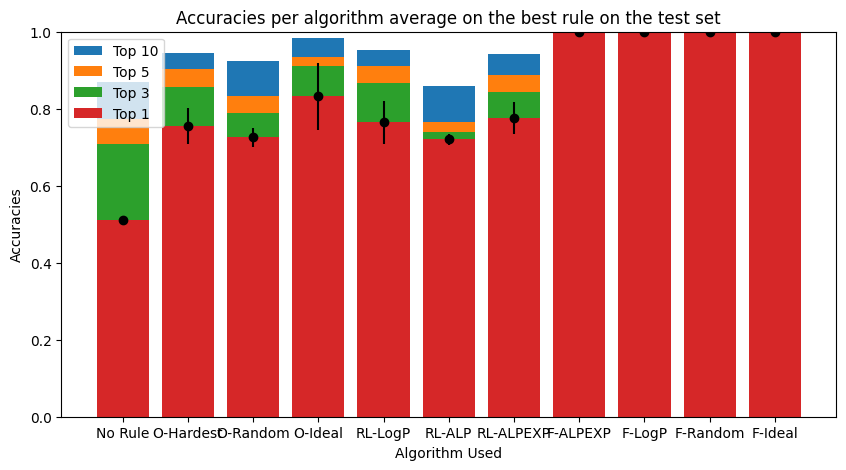

In [11]:
#Plot bar plot of success rate per algorithm
plt.figure(figsize=(10,5))
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 10"]) for rate in accuracies_per_algo.values()], label="Top 10")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 5"]) for rate in accuracies_per_algo.values()], label="Top 5")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 3"]) for rate in accuracies_per_algo.values()], label="Top 3")
plt.bar(accuracies_per_algo.keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo.values()], label="Top 1")
plt.legend()
plt.errorbar(accuracies_per_algo.keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo.values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo.values()], fmt='o', color='black')
plt.title("Accuracies per algorithm average on the best rule on the test set")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracies")
plt.ylim(0,1)
plt.show()

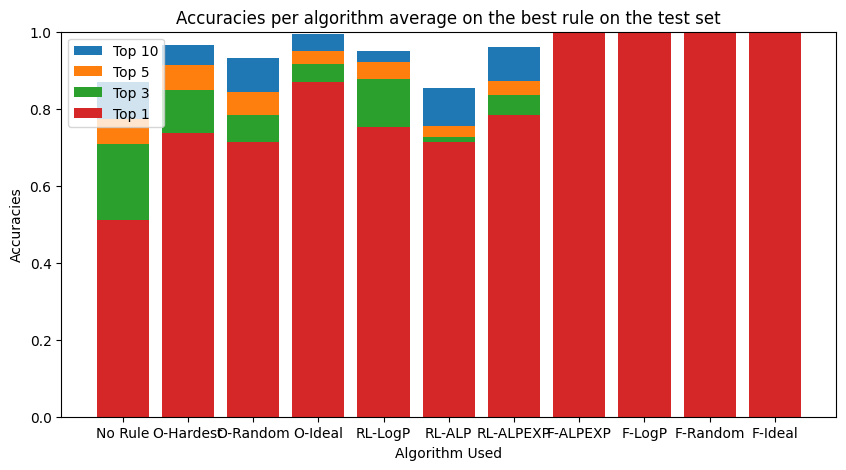

In [12]:
#Plot bar plot of success rate per algorithm
plt.figure(figsize=(10,5))
plt.bar(accuracies_per_algo.keys(), [np.median(rate["Top 10"]) for rate in accuracies_per_algo.values()], label="Top 10")
plt.bar(accuracies_per_algo.keys(), [np.median(rate["Top 5"]) for rate in accuracies_per_algo.values()], label="Top 5")
plt.bar(accuracies_per_algo.keys(), [np.median(rate["Top 3"]) for rate in accuracies_per_algo.values()], label="Top 3")
plt.bar(accuracies_per_algo.keys(), [np.median(rate["Top 1"]) for rate in accuracies_per_algo.values()], label="Top 1")
plt.legend()
plt.title("Accuracies per algorithm average on the best rule on the test set")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracies")
plt.ylim(0,1)
plt.show()

# Results per transition type

In [13]:
unique_transition_type = list(trans_names_for_plot.values())
all_accuracies = {key:{"Top 1":[0 for _ in range(len(all_rules))], "Top 3":[0 for _ in range(len(all_rules))], "Top 5":[0 for _ in range(len(all_rules))], "Top 10":[0 for _ in range(len(all_rules))]} for key in unique_transition_type}
n_transitions_per_type = {key:0 for key in unique_transition_type}

#Check if higher score is reached on the true observation for each rule
for i_episode, score_episode in enumerate(all_scores):
    for i_transition, score_transition in enumerate(score_episode):
        for i_rule in range(len(all_rules)):
            transition_type = all_transition_type[i_episode][i_transition][all_index_true[i_episode][i_transition]]
            true_score = score_transition[i_rule][all_index_true[i_episode][i_transition]]
            sorted_score_transition = sorted(score_transition[i_rule], reverse=True)
            index_true = sorted_score_transition.index(true_score)
            if index_true < 10:
                all_accuracies[transition_type]["Top 10"][i_rule] += 1
                if index_true < 5:
                    all_accuracies[transition_type]["Top 5"][i_rule] += 1
                    if index_true < 3:
                        all_accuracies[transition_type]["Top 3"][i_rule] += 1
                        if index_true ==0:
                            all_accuracies[transition_type]["Top 1"][i_rule] += 1
        n_transitions_per_type[transition_type] +=1                

    
for transition_type in all_accuracies.keys():
    for key, values in all_accuracies[transition_type].items():
        all_accuracies[transition_type][key] = [value/n_transitions_per_type[transition_type] if n_transitions_per_type[transition_type] >0 else 0 for value in values]

In [14]:
#Regroup success rate per algorithm
accuracies_per_algo_per_type = {key:{} for key in unique_transition_type}
for transition_type in unique_transition_type:
    for i_algo, algo in enumerate(algorithm_used):
        if algo not in accuracies_per_algo_per_type[transition_type]:
            accuracies_per_algo_per_type[transition_type][algo] = {"Top 1": [], "Top 3": [], "Top 5": [], "Top 10": []}
        accuracies_per_algo_per_type[transition_type][algo]["Top 1"].append(all_accuracies[transition_type]["Top 1"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 3"].append(all_accuracies[transition_type]["Top 3"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 5"].append(all_accuracies[transition_type]["Top 5"][i_algo])
        accuracies_per_algo_per_type[transition_type][algo]["Top 10"].append(all_accuracies[transition_type]["Top 10"][i_algo])

In [15]:
# Get performance for all transition for an algorithm for latex
algo_name = "RL-ALPEXP"
top = "Top 3"
for transition_type in unique_transition_type:
    print(format(np.mean(accuracies_per_algo_per_type[transition_type][algo_name][top]), ".2f") + " || " + format(np.std(accuracies_per_algo_per_type[transition_type][algo_name][top]), ".2f"), end=" & ")
print()
print(" & ".join([format(np.mean(rate), ".2f") for rate in [accuracies_per_algo_per_type[transition_type][algo_name][top] for transition_type in unique_transition_type]]))

1.00 || 0.00 & 0.71 || 0.29 & 0.34 || 0.36 & 0.40 || 0.43 & 0.02 || 0.06 & 0.08 || 0.14 & 
1.00 & 0.71 & 0.34 & 0.40 & 0.02 & 0.08


In [16]:
#Plot bar plot of success rate per transition for specific algorithm
algo_names = []
top = "Top 3"
plt.figure(figsize=(10,10))
for i_algo_name, algo_name in enumerate(algo_names):
    plt.bar(np.arange(len(unique_transition_type)) + i_algo_name*0.15, [np.mean(rate) for rate in [accuracies_per_algo_per_type[transition_type][algo_name][top] for transition_type in unique_transition_type]], label=algo_name, width=0.15, tick_label=unique_transition_type)
    plt.legend()
    plt.ylim(0,1)
    # plt.errorbar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], fmt='o', color='black')
    plt.title(f"{top} accuracies on the test set")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
plt.show()

<Figure size 1000x1000 with 0 Axes>

In [17]:
for algo in accuracies_per_algo_per_type[unique_transition_type[0]].keys():
    print(f"{algo} ", end="")
    for transition_type in accuracies_per_algo_per_type:
        print(f"& {format(np.mean(accuracies_per_algo_per_type[transition_type][algo]['Top 3']), '.2f')} $\pm$ {format(np.std(accuracies_per_algo_per_type[transition_type][algo]['Top 3']), '.2f')} ", end="")
    print(r"\\")

No Rule & 0.82 $\pm$ 0.00 & 1.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 \\
O-Hardest & 1.00 $\pm$ 0.00 & 0.86 $\pm$ 0.21 & 0.11 $\pm$ 0.28 & 0.29 $\pm$ 0.34 & 0.27 $\pm$ 0.37 & 0.21 $\pm$ 0.37 \\
O-Random & 1.00 $\pm$ 0.00 & 0.48 $\pm$ 0.26 & 0.07 $\pm$ 0.19 & 0.18 $\pm$ 0.31 & 0.00 $\pm$ 0.00 & 0.04 $\pm$ 0.11 \\
O-Ideal & 1.00 $\pm$ 0.00 & 0.94 $\pm$ 0.15 & 0.00 $\pm$ 0.00 & 0.94 $\pm$ 0.17 & 0.25 $\pm$ 0.26 & 0.46 $\pm$ 0.37 \\
RL-LogP & 1.00 $\pm$ 0.00 & 0.67 $\pm$ 0.30 & 0.34 $\pm$ 0.25 & 0.74 $\pm$ 0.32 & 0.02 $\pm$ 0.06 & 0.29 $\pm$ 0.42 \\
RL-ALP & 1.00 $\pm$ 0.00 & 0.20 $\pm$ 0.26 & 0.00 $\pm$ 0.00 & 0.03 $\pm$ 0.08 & 0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 \\
RL-ALPEXP & 1.00 $\pm$ 0.00 & 0.71 $\pm$ 0.29 & 0.34 $\pm$ 0.36 & 0.40 $\pm$ 0.43 & 0.02 $\pm$ 0.06 & 0.08 $\pm$ 0.14 \\
F-ALPEXP & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 \\
F-LogP & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 

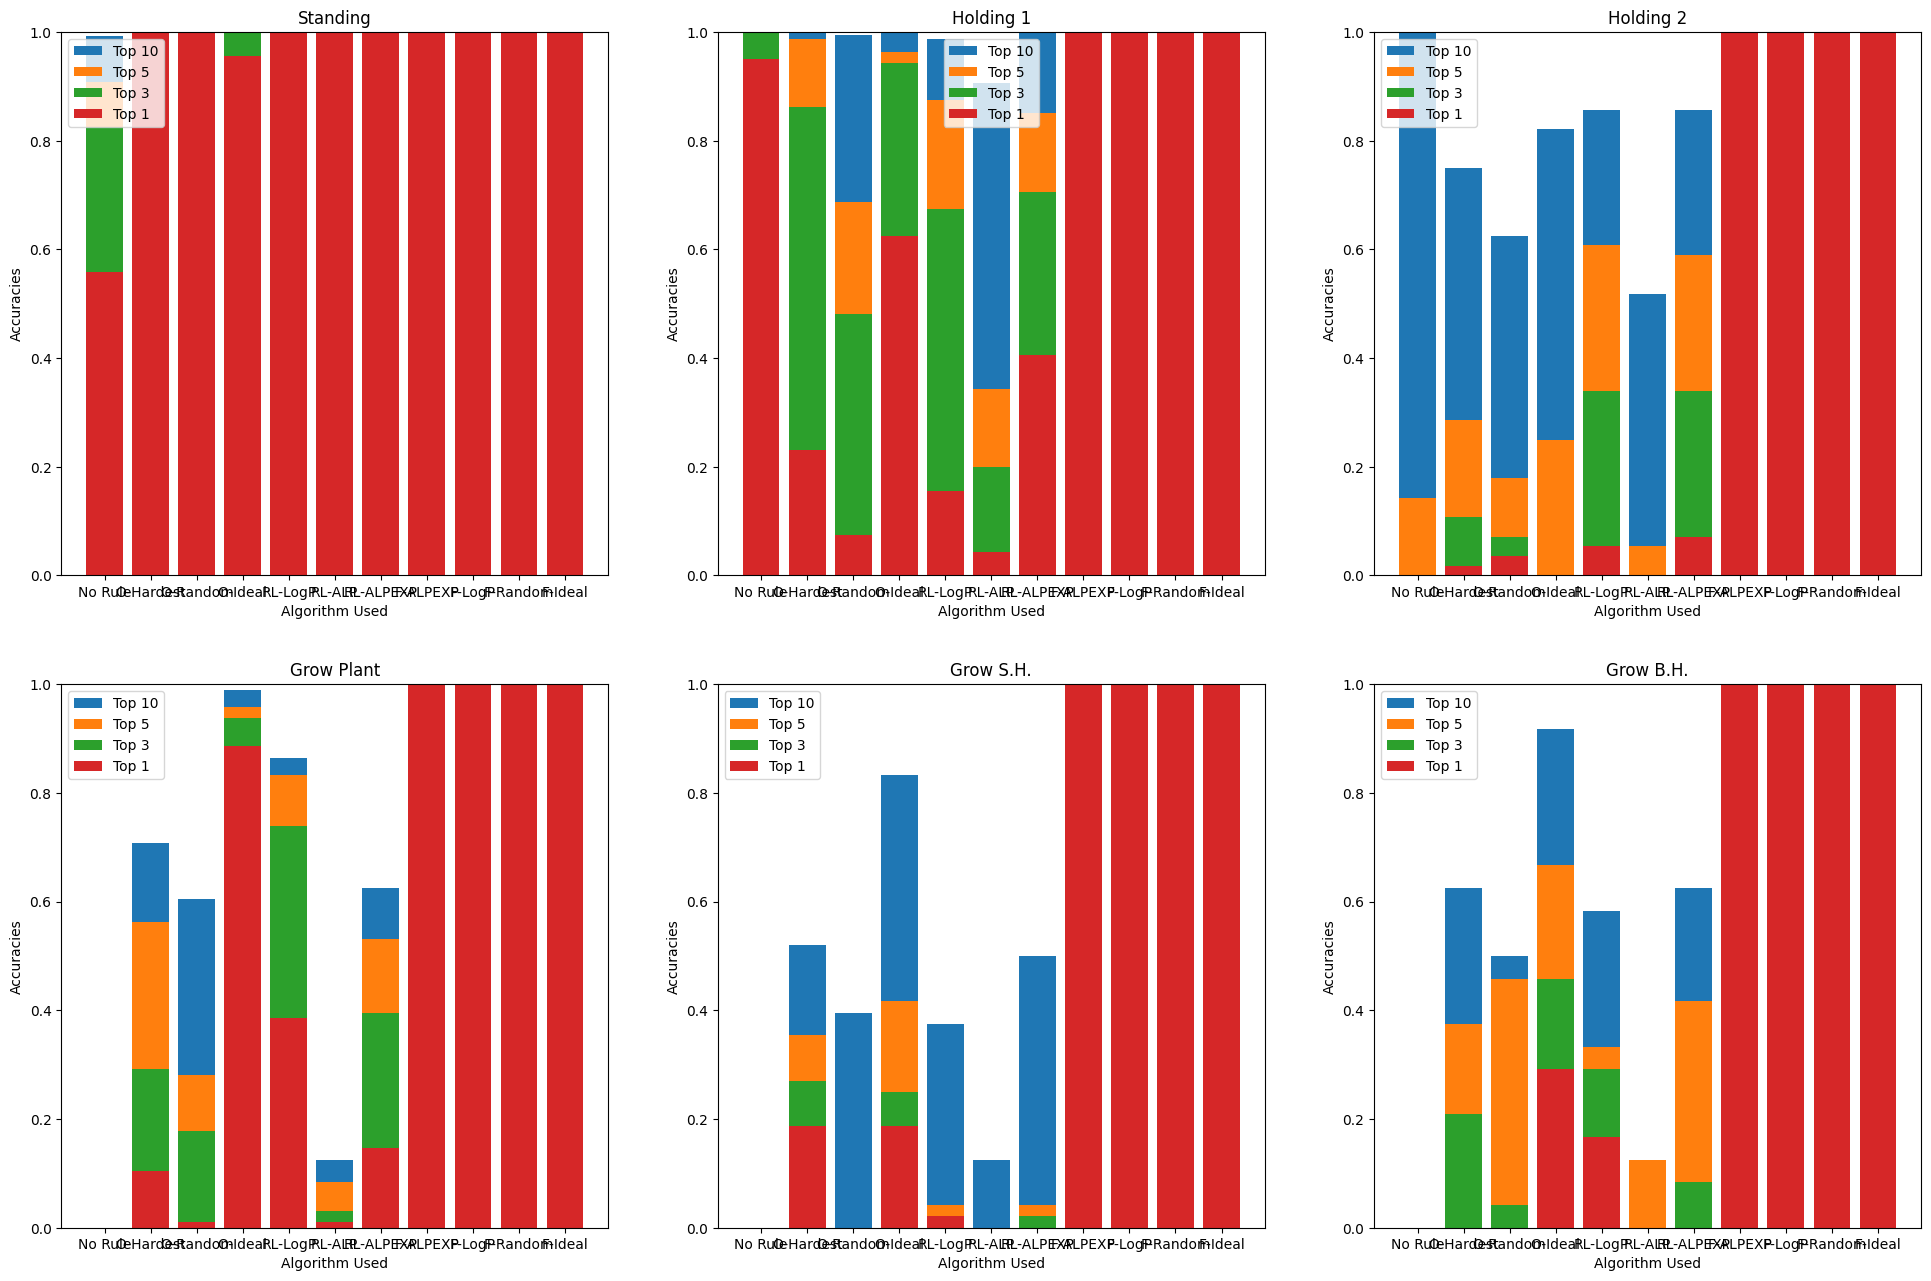

In [18]:
#Plot bar plot of success rate per algorithm for each transition type
plt.figure(figsize=(24,24))
for i_type, transition_type in enumerate(unique_transition_type):
    plt.subplot(3,3,i_type+1)
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 10"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 10")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 5"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 5")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 3"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 3")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 1")
    plt.legend()
    plt.ylim(0,1)
    # plt.errorbar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], fmt='o', color='black')
    plt.title(f"{transition_type}")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
plt.show()

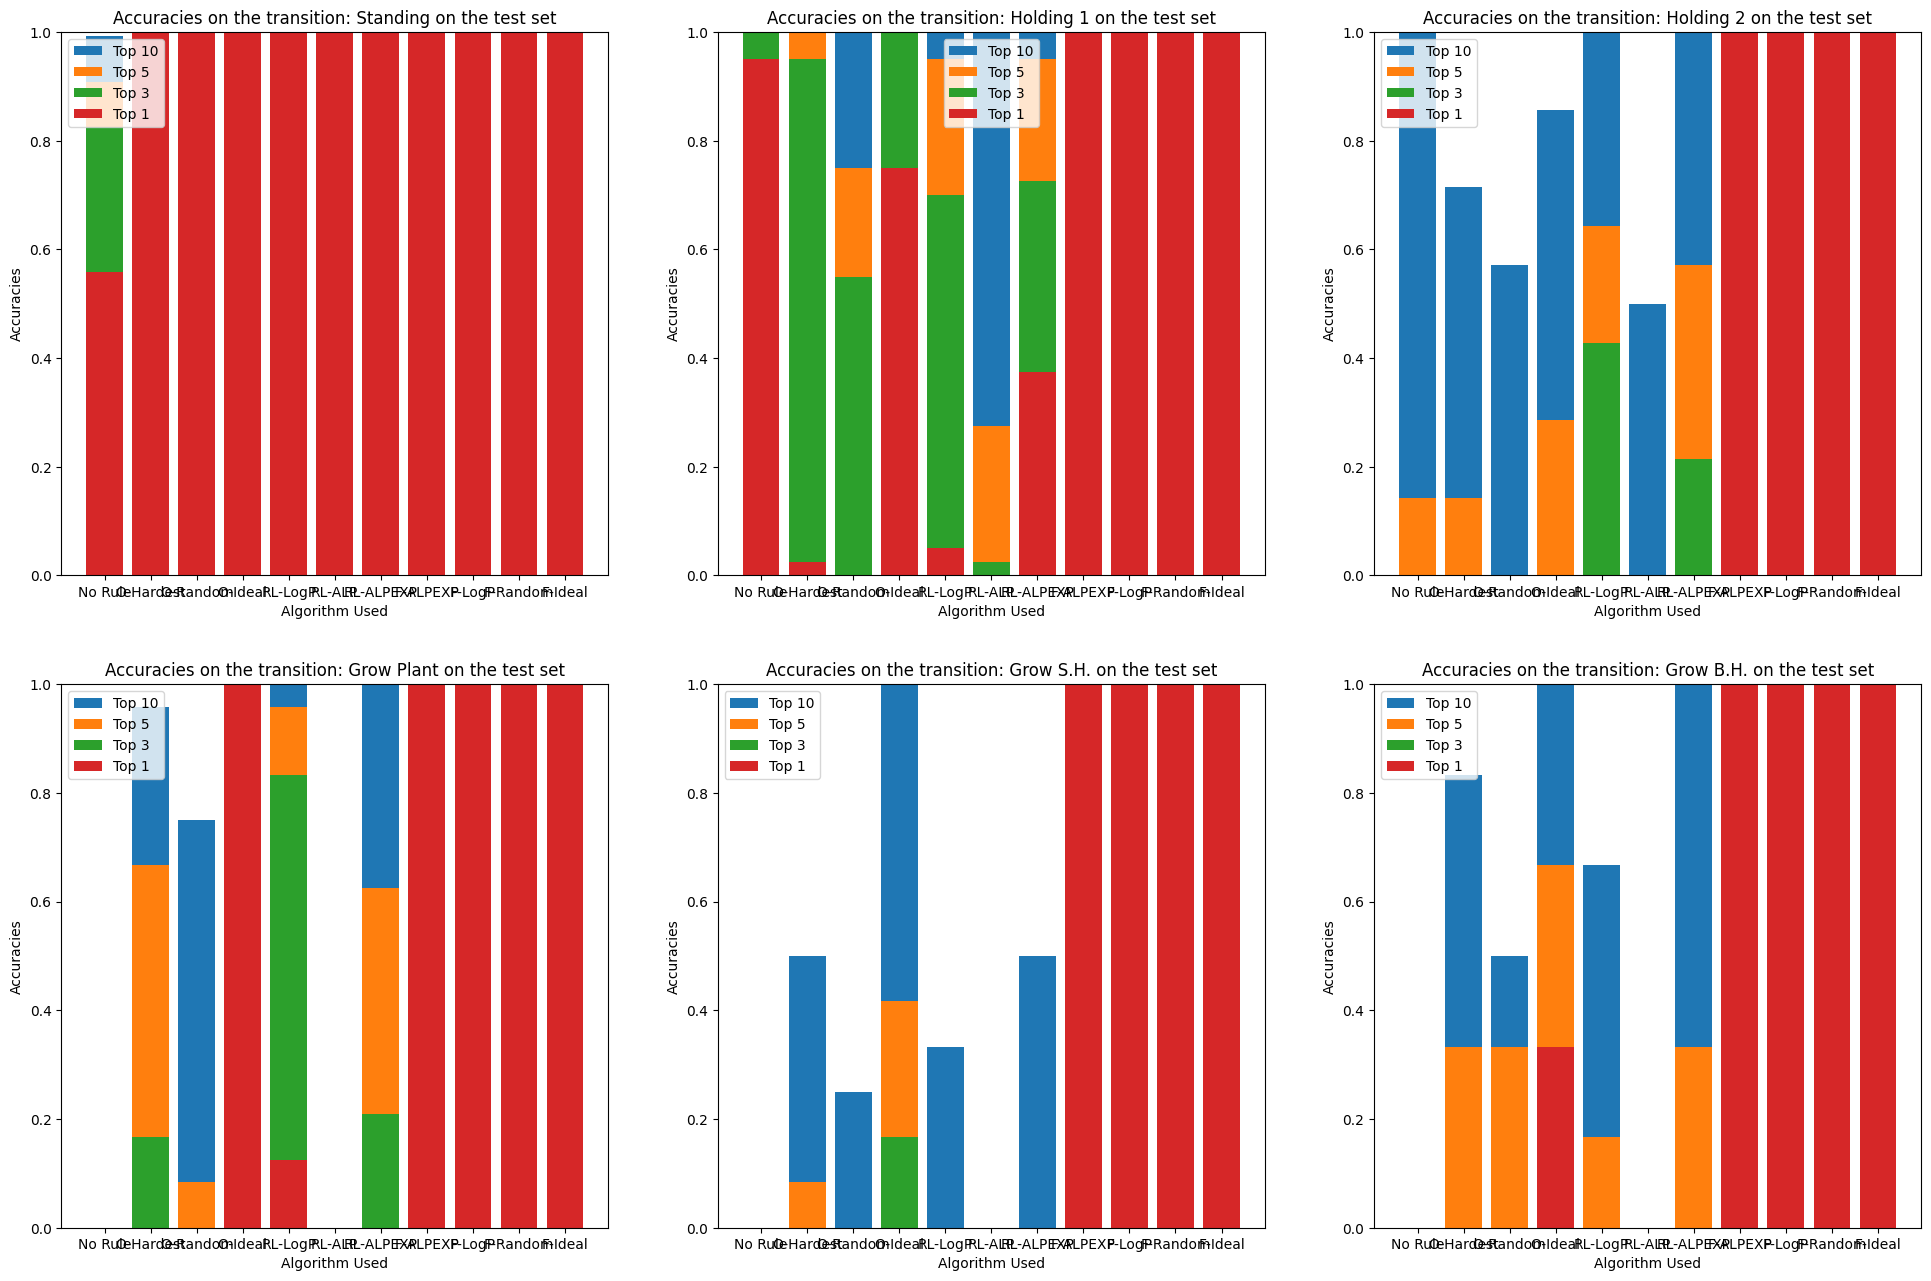

In [19]:
#Plot bar plot of the median success rate per algorithm for each transition type
plt.figure(figsize=(24,24))
for i_type, transition_type in enumerate(unique_transition_type):
    plt.subplot(3,3,i_type+1)
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.median(rate["Top 10"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 10")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.median(rate["Top 5"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 5")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.median(rate["Top 3"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 3")
    plt.bar(accuracies_per_algo_per_type[transition_type].keys(), [np.median(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], label="Top 1")
    plt.legend()
    plt.ylim(0,1)
    # plt.errorbar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], fmt='o', color='black')
    plt.title(f"Accuracies on the transition: {transition_type} on the test set")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
plt.show()

KeyError: 'O-Curriculum'

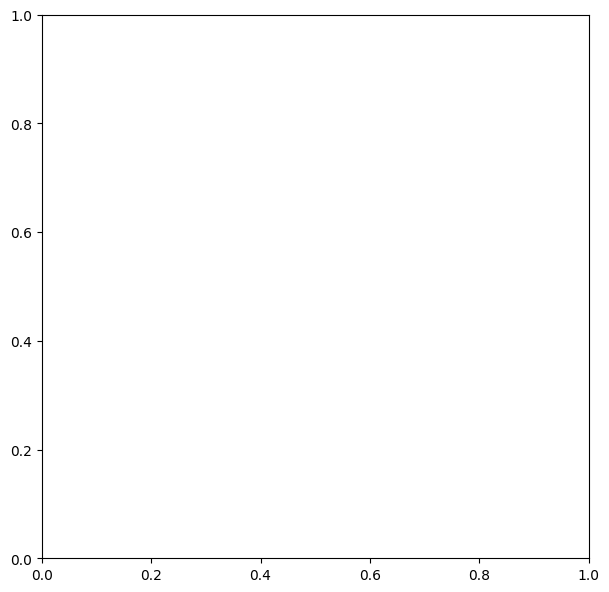

In [20]:
# Plot the success rate for a particular algorithm across all seeds
algo_name = "O-Curriculum"
#Plot bar plot of the median success rate per algorithm for each transition type
plt.figure(figsize=(24,24))
for i_type, transition_type in enumerate(unique_transition_type):
    plt.subplot(3,3,i_type+1)
    plt.bar(np.arange(len(accuracies_per_algo_per_type[transition_type][algo_name]["Top 10"])), [rate for rate in accuracies_per_algo_per_type[transition_type][algo_name]["Top 10"]], label="Top 10")
    plt.bar(np.arange(len(accuracies_per_algo_per_type[transition_type][algo_name]["Top 5"])), [rate for rate in accuracies_per_algo_per_type[transition_type][algo_name]["Top 5"]], label="Top 5")
    plt.bar(np.arange(len(accuracies_per_algo_per_type[transition_type][algo_name]["Top 3"])), [rate for rate in accuracies_per_algo_per_type[transition_type][algo_name]["Top 3"]], label="Top 3")
    plt.bar(np.arange(len(accuracies_per_algo_per_type[transition_type][algo_name]["Top 1"])), [rate for rate in accuracies_per_algo_per_type[transition_type][algo_name]["Top 1"]], label="Top 1")
    plt.ylim(0,1)
    # plt.errorbar(accuracies_per_algo_per_type[transition_type].keys(), [np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], [np.std(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()], fmt='o', color='black')
    plt.title(f"Accuracies on the transition: {transition_type} for {algo_name}")
    plt.xlabel("Seed")
    plt.ylabel("Accuracies")
    plt.legend(loc="upper left")
plt.show()

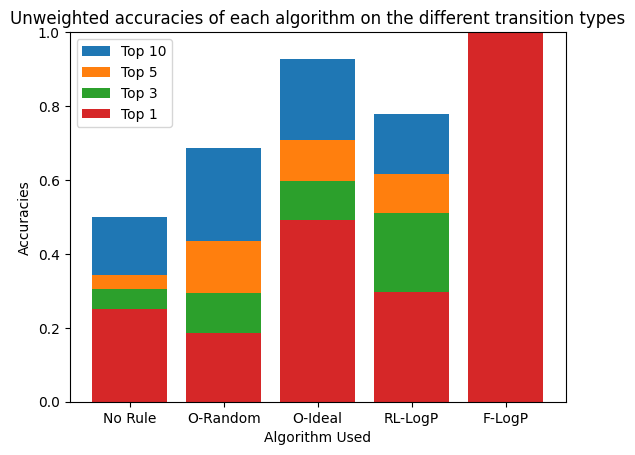

In [ ]:
#Plot bar plot of success rate per algorithm for each transition type
plt.figure()
algorithm_names = accuracies_per_algo_per_type["Standing"].keys()
mean_top1 = np.array([[np.mean(rate["Top 1"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
mean_top3 = np.array([[np.mean(rate["Top 3"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
mean_top5 = np.array([[np.mean(rate["Top 5"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
mean_top10 = np.array([[np.mean(rate["Top 10"]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]).mean(axis=0)
plt.bar(algorithm_names, mean_top10, label="Top 10")
plt.bar(algorithm_names, mean_top5, label="Top 5")
plt.bar(algorithm_names, mean_top3, label="Top 3")
plt.bar(algorithm_names, mean_top1, label="Top 1")
plt.legend()
plt.title("Unweighted accuracies of each algorithm on the different transition types")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracies")
plt.ylim(0,1)
plt.show()

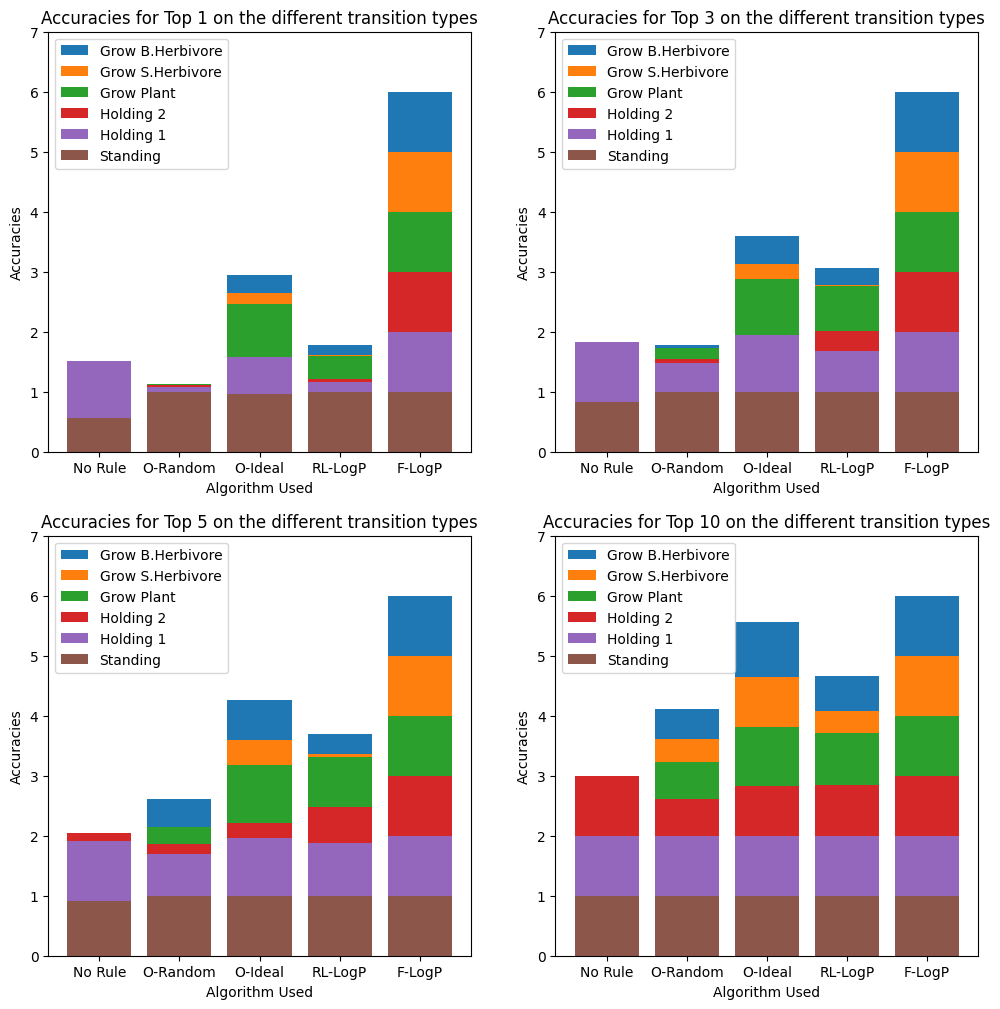

In [ ]:
#Plot bar plot of success rate per algorithm for each transition type
plt.figure(figsize=(12,12))
for i_top, top in enumerate(["Top 1", "Top 3", "Top 5", "Top 10"]):
    plt.subplot(2,2,i_top+1)
    top_per_algo_per_acc = np.cumsum(np.array([[np.mean(rate[top]) for rate in accuracies_per_algo_per_type[transition_type].values()] for transition_type in unique_transition_type]), axis=0)
    for i_transition in range(len(unique_transition_type)-1, -1, -1):
        plt.bar(algorithm_names, top_per_algo_per_acc[i_transition], label=f"{unique_transition_type[i_transition]}")
    plt.legend()
    plt.title(f"Accuracies for {top} on the different transition types")
    plt.xlabel("Algorithm Used")
    plt.ylabel("Accuracies")
    plt.ylim(0,7)
plt.show()

# Gain distribution for single example

In [ ]:
target_transition_type = "transformBH"
for i_episode, transitions in enumerate(all_transition_type):
    for i_transition, transition in enumerate(transitions):
        if transition[all_index_true[i_episode][i_transition]] == target_transition_type:
            indices = (i_episode, i_transition)
            print(transition)
            print(indices)
            print(all_index_true[i_episode][i_transition])

['holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding1', 'holding1', 'holding1', 'holding1', 'transformBH', 'standing', 'standing', 'standing', 'standing', 'standing']
(3, 18)
16
['holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding1', 'holding1', 'holding1', 'holding1', 'transformBH', 'standing', 'standing', 'standing', 'standing', 'standing']
(4, 18)
16
['holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding2', 'holding1', 'holding1', 'holding1', 'holding1', 'transformBH', 'standing', 'standing', 'standing', 'standing', 'standing']
(5, 18)
16


In [ ]:
indices = (0,0)
standing_index = 0
print(all_transition_type[indices[0]] [indices[1]][all_index_true[indices[0]][indices[1]]])
print(all_index_true[indices[0]][indices[1]])

Standing
32


In [21]:
index_rule = 0
values = [all_scores[indices[0]][indices[1]][index_rule][standing_index],all_scores[indices[0]][indices[1]][index_rule][all_index_true[indices[0]][indices[1]]]]
plt.figure()
plt.bar(["Standing","Grow BH", ], values)
plt.ylabel("Log Likelihood")
plt.xlabel("Transition Type")
plt.ylim(-45,0)
plt.show()

NameError: name 'indices' is not defined

# Compare likelihood for few selected example

In [22]:
# Select example for custom type
different_transition_type = list(trans_names_for_plot.values())
all_types_indices= {}
for i_episode, transitions in enumerate(all_transition_type):
    for i_transition, transition in enumerate(transitions):
        current_transition_type = transition[all_index_true[i_episode][i_transition]]
        if current_transition_type not in all_types_indices:
            all_types_indices[current_transition_type] = [(i_episode, i_transition)]
        else:
            all_types_indices[current_transition_type].append((i_episode, i_transition))

Rule:  1. Standing on a pet allows you to pick it up.
2. The object transforms into the last pet you picked up.

Actions that follow this pattern:

- You go to the baby pig. The change is: You are standing on the baby pig.
- You pick up the object (pet). The change is: In your inventory, there is the baby pig.
- You go to the baby giraffe. The change is: You are standing on the baby giraffe.
- You go to the water. The change is: You are standing on the water.
- You go to the baby giraffe (even after picking up the same one). The change is: You are standing on the baby giraffe.
- You pick up the object (pet). The change is: In your inventory, there are the baby giraffe and the water.
- You go type:  O-Random
Indices:  (4, 3)  True observation:  39
[45 46 41 43 42 44 35 29 24 36]
['Standing' 'Standing' 'Standing' 'Standing' 'Standing' 'Standing'
 'Holding 1' 'Holding 2' 'Holding 2' 'Holding 1']
[-1.34218132 -2.29853535 -2.93107247 -4.48840046 -5.08421659 -5.27823877
 -6.01368237 -7.18427

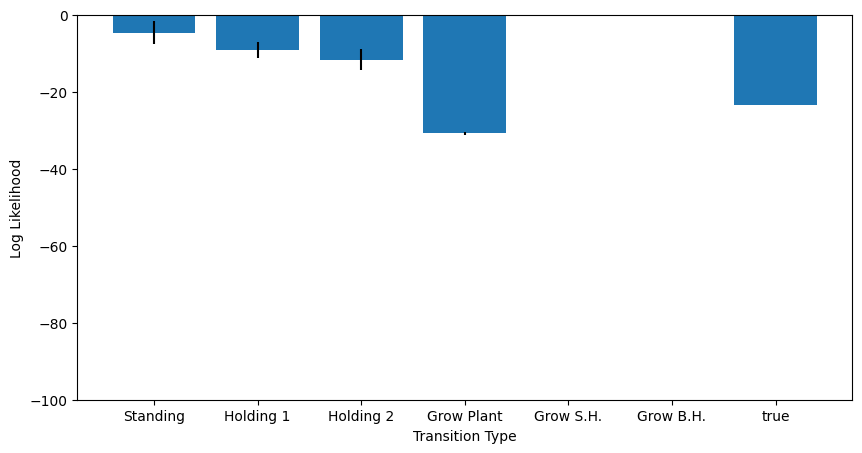

In [23]:
# Check different log probs for an example of a type:
# We check no rule for now
index_rule = 15
print("Rule: ", all_rules[index_rule], "type: ", algorithm_used[index_rule])
transition_type, index = "Grow Plant", 0
np.random.seed(0)
shuffled_indices = np.random.permutation(len(all_types_indices[transition_type]))
for index in range(1):
    indices = all_types_indices[transition_type][shuffled_indices[index]]
    transition = all_transition_type[indices[0]][indices[1]]
    # Regroup transition type and true observation
    transition_type_to_index = {type: [] for type in different_transition_type+["true"]}
    for incr, type in enumerate(transition):
        if incr == all_index_true[indices[0]][indices[1]]:
            transition_type_to_index["true"].append(incr)
        else:
            transition_type_to_index[type].append(incr)
    # Plot the result for the current example
    values = np.array(all_scores[indices[0]][indices[1]][index_rule])
    indices_sorted = np.argsort(-values)
    print("Indices: ", indices, " True observation: ", all_index_true[indices[0]][indices[1]])
    print(indices_sorted[:10])
    print(np.array(all_transition_type[indices[0]][indices[1]])[indices_sorted[:10]])  
    print(values[indices_sorted[:10]])
    plt.figure(figsize=(10,5))
    plt.bar(transition_type_to_index.keys(),[values[indices].mean() for indices in transition_type_to_index.values()], yerr=[np.std(values[indices]) for indices in transition_type_to_index.values()])
    plt.ylim(-100,0)
    plt.ylabel("Log Likelihood")
    plt.xlabel("Transition Type")
    plt.show()

Rule:  None type:  No Rule
Rule:  # Environment Transformation Rules:

1. Standing on an object turns it into that type of object.
2. Picking up an object does not change its state; the object remains the one you stand on.
3. Replace the object's name (for example, "objects transform into ...").
4. Only actions with a state change should be noted.

Based on these rules for the given sequences, the transformations would be as follows:

1. You go to the water. You are standing on the water.
2. You pick up the object (water). In your inventory, there is water.
3. You go to the (object you stand on). You are standing on the (object you stand on).
4. You give the water. The objects transform into the (first item you stood on).
5. You pick up the object. In your inventory, there is the (last tied object type:  O-Hardest
Rule:  1. Standing on a pet allows you to pick it up.
2. The object transforms into the last pet you picked up.

Actions that follow this pattern:

- You go to the baby pig. 

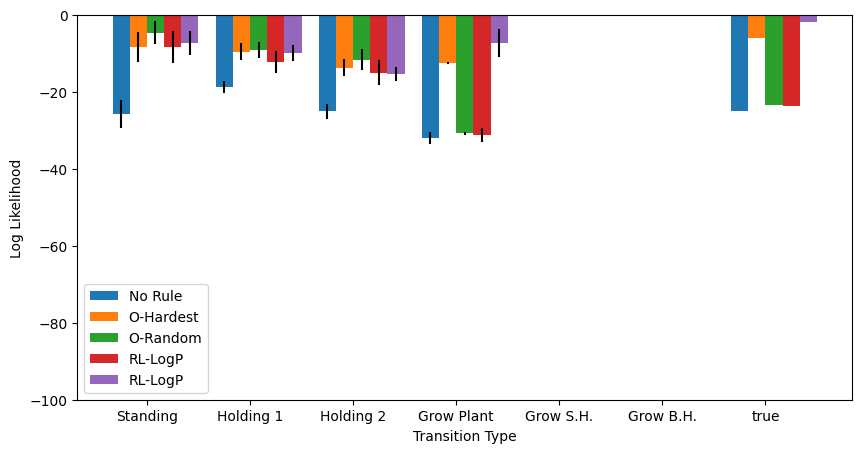

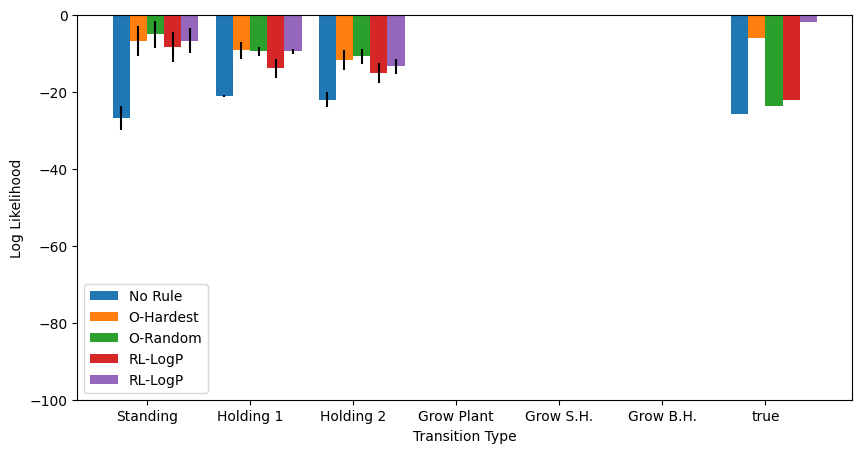

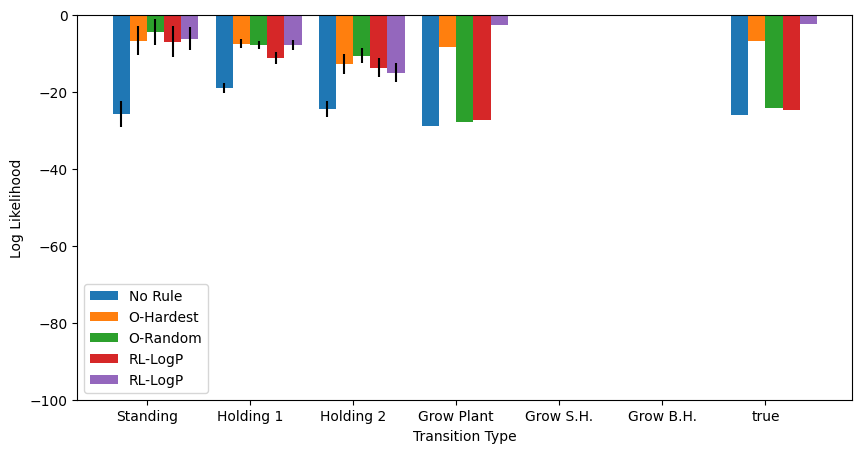

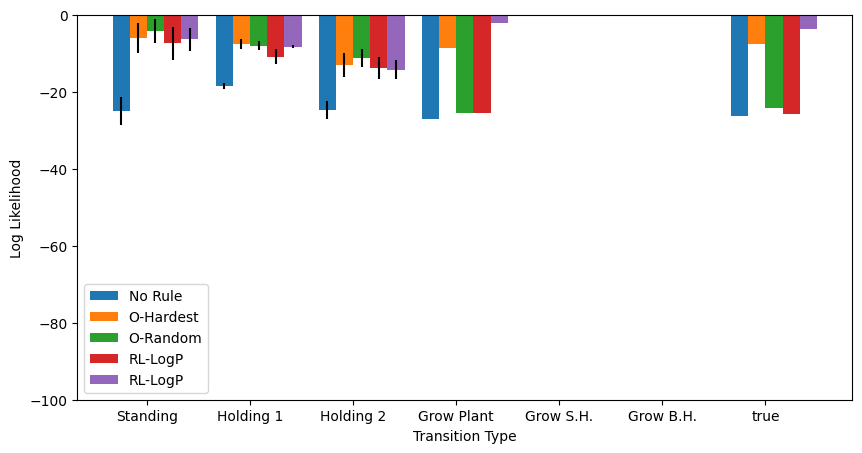

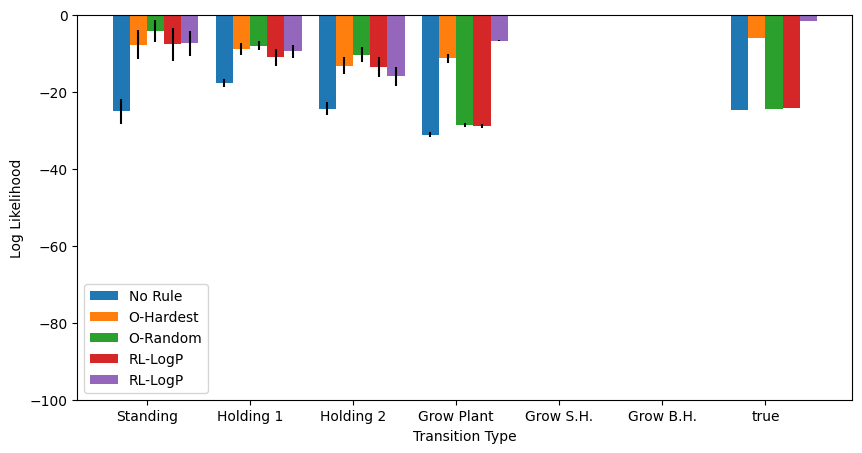

In [24]:
# Check different log probs for an example of a type:
# We compare 2 rules
all_index_rule = [0, 3, 15, 25, 26]
for index_rule1 in all_index_rule:
    print("Rule: ", all_rules[index_rule1], "type: ", algorithm_used[index_rule1])
transition_type, index = "Grow Plant", 0
np.random.seed(0)
shuffled_indices = np.random.permutation(len(all_types_indices[transition_type]))
for index in range(5):
    indices = all_types_indices[transition_type][shuffled_indices[index]]
    transition = all_transition_type[indices[0]][indices[1]]
    # Regroup transition type and true observation
    transition_type_to_index = {type: [] for type in different_transition_type+["true"]}
    for incr, type in enumerate(transition):
        if incr == all_index_true[indices[0]][indices[1]]:
            transition_type_to_index["true"].append(incr)
        else:
            transition_type_to_index[type].append(incr)
    # Plot the result for the current example
    plt.figure(figsize=(10,5))
    for incr,index_rule in enumerate(all_index_rule):
        values = np.array(all_scores[indices[0]][indices[1]][index_rule])
        indices_sorted = np.argsort(-values)
        plt.bar([i+1/(len(all_index_rule)+1)*incr for i in range(len(transition_type_to_index.keys()))],[values[indices].mean() for indices in transition_type_to_index.values()], yerr=[np.std(values[indices]) for indices in transition_type_to_index.values()],width=1/(len(all_index_rule)+1))
        plt.xticks([i+0.25 for i in range(len(transition_type_to_index.keys()))], transition_type_to_index.keys())
    plt.ylim(-100,0)
    plt.ylabel("Log Likelihood")
    plt.xlabel("Transition Type")
    plt.legend([algorithm_used[index_rule1] for index_rule1 in all_index_rule])
    plt.show()

##### Regroup per algo_type

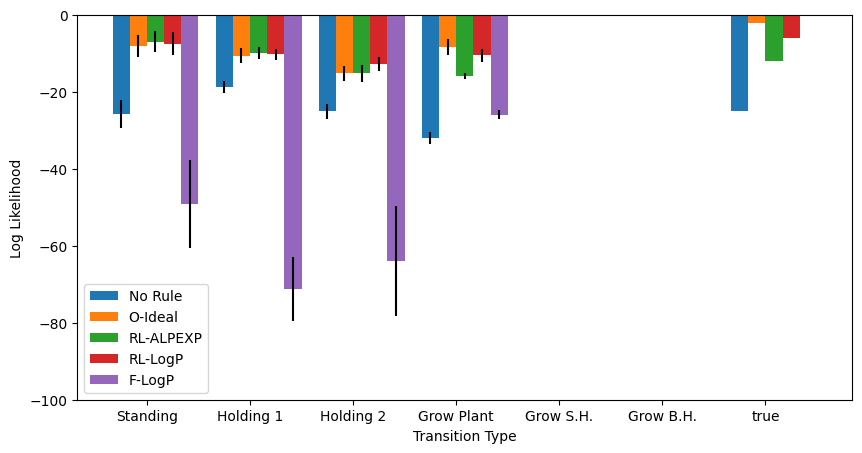

In [25]:
# Check different log probs for an example of a type:
algo_types = ["No Rule","O-Ideal", "RL-ALPEXP", "RL-LogP","F-LogP"]
transition_type = "Grow Plant"
np.random.seed(0)
shuffled_indices = np.random.permutation(len(all_types_indices[transition_type]))
for index in range(1):
    indices = all_types_indices[transition_type][shuffled_indices[index]]
    transition = all_transition_type[indices[0]][indices[1]]
    # Regroup transition type and true observation
    transition_type_to_index = {type: [] for type in different_transition_type+["true"]}
    for incr, type in enumerate(transition):
        if incr == all_index_true[indices[0]][indices[1]]:
            transition_type_to_index["true"].append(incr)
        else:
            transition_type_to_index[type].append(incr)
    # Plot the result for the current example
    plt.figure(figsize=(10,5))
    for incr,algo_type in enumerate(algo_types):
        mask = np.where(np.array(algorithm_used)==algo_type)[0]
        values = np.array(all_scores[indices[0]][indices[1]])[mask]
        mean_values = values.mean(axis=0)
        plt.bar([i+1/(len(algo_types)+1)*incr for i in range(len(transition_type_to_index.keys()))],[mean_values[indices].mean() for indices in transition_type_to_index.values()], yerr=[np.std(mean_values[indices], axis=0) for indices in transition_type_to_index.values()],width=1/(len(algo_types)+1))
        plt.xticks([i+0.25 for i in range(len(transition_type_to_index.keys()))], transition_type_to_index.keys(),)
    plt.ylim(-100,0)
    plt.ylabel("Log Likelihood")
    plt.xlabel("Transition Type")
    plt.legend(algo_types)
    plt.show()

# Sanity Check

In [13]:
# Check different log probs for an example of a type:
algo_types = ["PB","CP","RB","DB"]
transition_type = "holding2"
# Get all the score for the desire tranition
flatten_score = []
for incr_episode in range(len(all_index_true)):
    for incr_transition in range(len(all_index_true[incr_episode])):
        true_index = all_index_true[incr_episode][incr_transition]
        if all_transition_type[incr_episode][incr_transition][true_index] == transition_type:
            flatten_score.append(np.array(all_scores[incr_episode][incr_transition])[:,true_index])
flatten_score = np.array(flatten_score).T
# Plot the result for the current example
plt.figure(figsize=(10,5))
for incr,algo_type in enumerate(algo_types):
    mask = np.where(np.array(algorithm_used)==algo_type)[0]
    values = flatten_score[mask].mean(axis=1)
    plt.errorbar(0, values.mean(), yerr=values.std(), label=algo_type, capsize=2, fmt='o')
plt.ylim(-30,0)
plt.ylabel("Log Likelihood")
plt.xlabel("Transition Type")
plt.legend(algo_types)
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1

<Figure size 1000x500 with 0 Axes>